## What Is Terrorism?
Terrorism, the calculated use of violence to create a general climate of fear in a population and thereby to bring about a particular political objective. Terrorism has been practiced by political organizations with both rightist and leftist objectives, by nationalistic and religious groups, by revolutionaries, and even by state institutions such as armies, intelligence services, and police.


Over the past decade, terrorists killed an average of 21,000 people worldwide each year. The global death toll from terrorism over the past decade ranged from 8,000 in 2010 to a high of 44,000 in 2014. In most countries terrorism accounts for less than 0.01% of deaths, but in countries of high-conflict, this can be as much as several percent. Public concern about terrorism is high – in many countries more than half say they are concerned about being a victim.


In this notebook on Exploratory Data Analysis we are going to explore the terrorist activities around the world using the global terrorism dataset. Here different kinds of Plots are used, for making the exploration easy and more informative. 

<img src = "terror.jpg" style = "width:800px; height:400px" />

### Contents In The Notebook

  * Importing Essential Libraries
  * Getting Data Ready
  * Some Basic Analysis
  * Attacking Methods
  * Trends in Terrorism
  * Deadliest Terrorist Groups
  * Region Wise Success %
  * Overall Success %
  * Result

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = 15, 6

### Getting Data Ready

In [10]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

print(df.shape)
print("Total number of features: ", df.shape[1])
print("Total number of datapoints: ", df.shape[0])
print("Link to the global terrorism dataset: ", "https://bit.ly/2TK5Xn5")

C:\Users\rautp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(181691, 135)
Total number of features:  135
Total number of datapoint:  181691
Link to the global terrorism dataset:  https://bit.ly/2TK5Xn5


In [11]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
features_with_na = []
for feature in df.columns:
    if df[feature].isnull().sum() >= 1:
        perc = df[feature].isnull().mean() * 100
        features_with_na.append([np.round(perc, 2), feature])
        
def sort_f(e):
    return e[0]
    
features_with_na.sort(reverse = True, key = sort_f)        

d = {"Feature": [], "% Missing Values": []}
    
for x in features_with_na:
    d["Feature"].append(x[1]) 
    d["% Missing Values"].append(x[0])

d = pd.DataFrame(d).sort_values(by = '% Missing Values', ascending = False)
d.head(25)

,Feature,% Missing Values
0,gsubname3,99.99
1,weaptype4,99.96
2,weaptype4_txt,99.96
3,weapsubtype4,99.96
4,weapsubtype4_txt,99.96
5,claimmode3,99.93
6,claimmode3_txt,99.93
7,gsubname2,99.91
8,gname3,99.82
9,guncertain3,99.82


In [13]:
missing_vals = np.round(len(features_with_na) / df.shape[1], 2) * 100
print("% of features containing Missing Values: ", missing_vals)
print("% of features not containing Missing Values: ", np.round(100 - missing_vals, 2))
cnt_25 = 0
for x in features_with_na:
    if x[0] <= 25:
        cnt_25 += 1;
print("% of features containing <= 25% Missing Values: ", np.round((cnt_25 / len(features_with_na)) * 100, 2))

% of features containing Missing Values:  79.0
% of features not containing Missing Values:  21.0
% of features containing <= 25% Missing Values:  17.92


In [14]:
# Renaming Relevant Columns
df.rename(columns={'suicide':'Suicide','latitude':'Latitude','longitude':'Longitude','success':'Success',
                   'city':'City','iyear':'Year','imonth':'Month','iday':'Day',
                   'country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df = df[['Year','Month','Day','Country','Success','Region','City','Suicide','Latitude','Longitude',
         'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['Casualities'] = df['Killed'] + df['Wounded']
 
df.head(3)    

,Year,Month,Day,Country,Success,Region,City,Suicide,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,1,Central America & Caribbean,Santo Domingo,0,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,1,North America,Mexico city,0,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,1,Southeast Asia,Unknown,0,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [15]:
df.describe()

,Year,Month,Day,Success,Suicide,Latitude,Longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,0.889598,0.036507,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,0.313391,0.187549,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222AA2C0B50>,
      dtype=object)

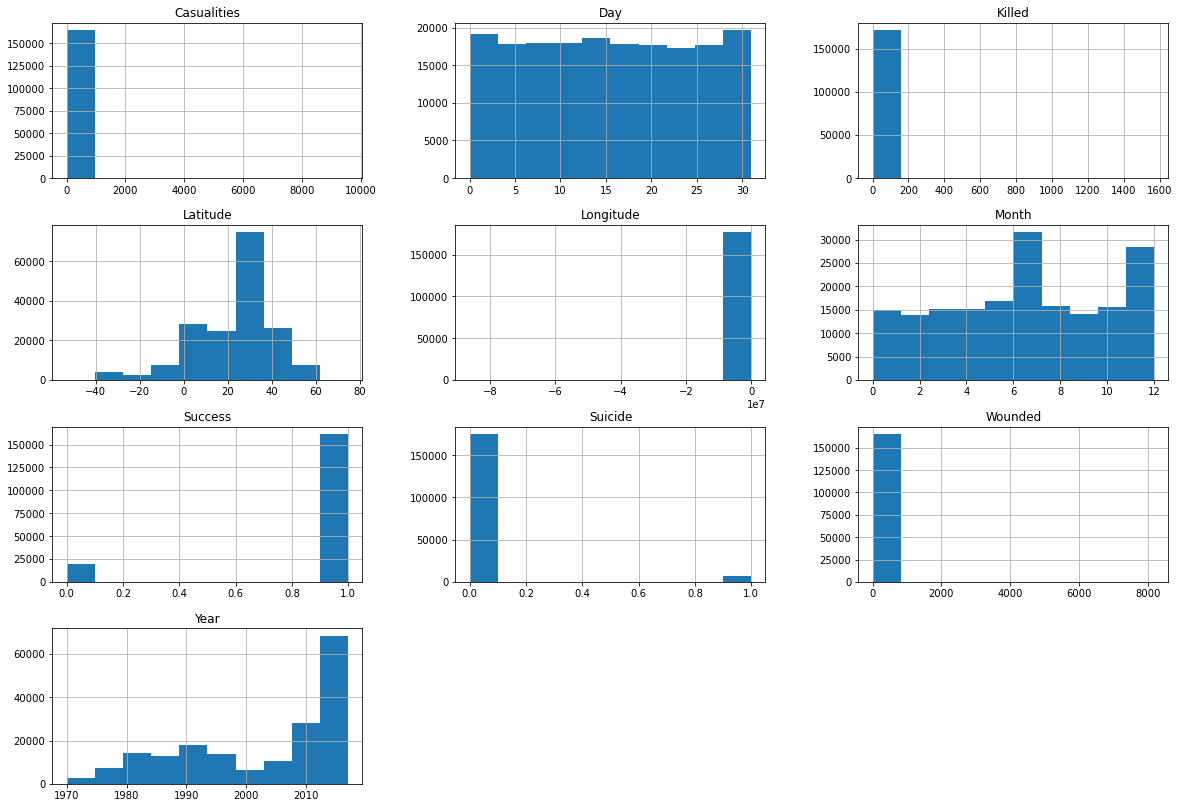

In [16]:
df.hist(figsize = (20, 14))

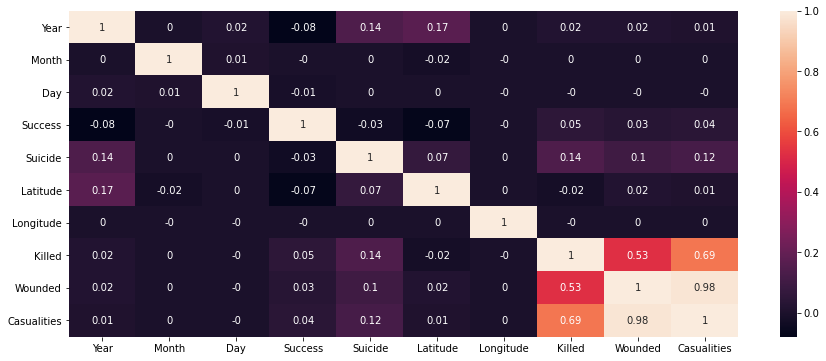

In [17]:
plt.figure()

sns.heatmap(np.round(df.corr(), 2), annot = True)

### Some Basic Analysis

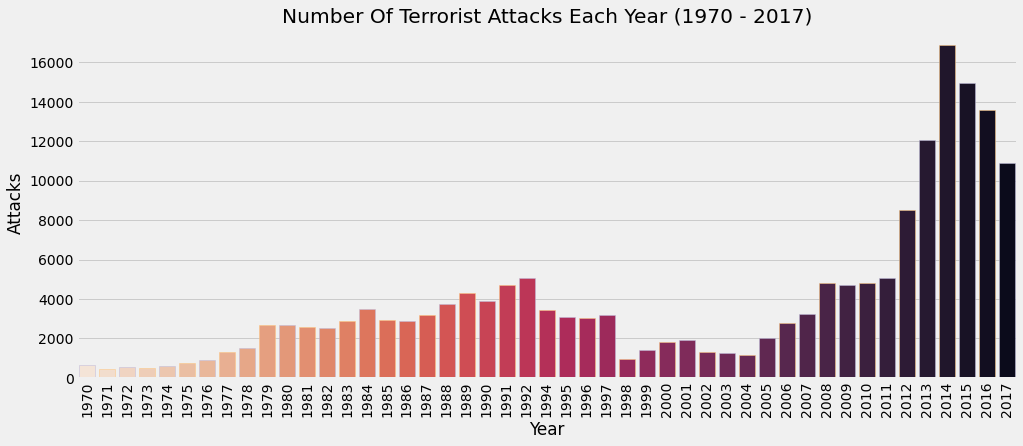

In [18]:
from matplotlib import style
style.use("fivethirtyeight")


sns.countplot(df["Year"], palette='rocket_r', edgecolor = sns.color_palette("PuOr_r", 2))
plt.xticks(rotation = 90)
plt.ylabel("Attacks")
plt.title('Number Of Terrorist Attacks Each Year (1970 - 2017)')
plt.show()


  * In 2014 highest number of terrorist attacks takes place. 
  * After 2004 there is a rapid increase in the number of attacks per year.  


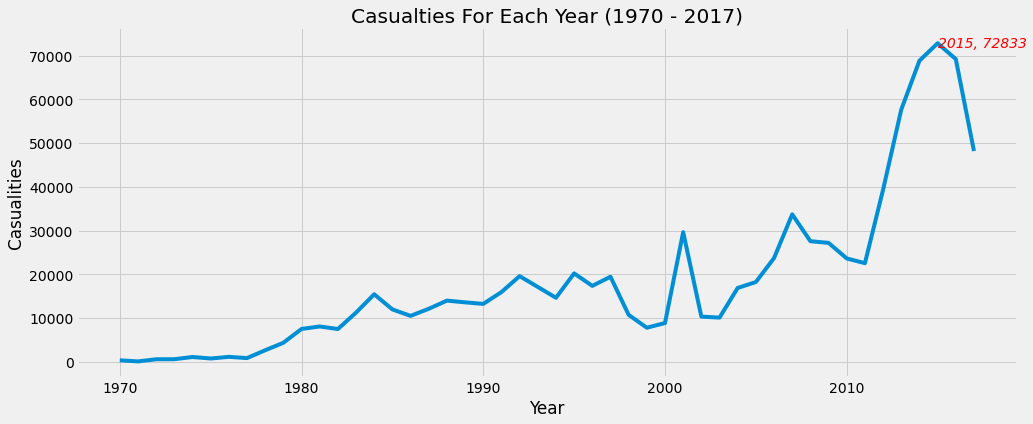

In [21]:
year_wise_casualties = df.groupby('Year')['Casualities'].sum()
ax = sns.lineplot(year_wise_casualties.index, year_wise_casualties)
plt.title('Casualties For Each Year (1970 - 2017)')

ax.text(2015, 72833, "2015, 72833", verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
plt.show()


  * After the year 2000, there is a rapid increase in the number of casualties which also confirms the rapid number increase in terrorist attacks.
  * 2015 was the year where the most number of casualties takes place (72833).
  * After 2015 there is a steep decline in the number of casualties.

In [23]:
cntry = list(df['Country'].value_counts().index)
atkcnt = list(df['Country'].value_counts())
d = {"Country" : cntry, "Attacks": atkcnt}
d = pd.DataFrame(d)
d.head(10)

,Country,Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


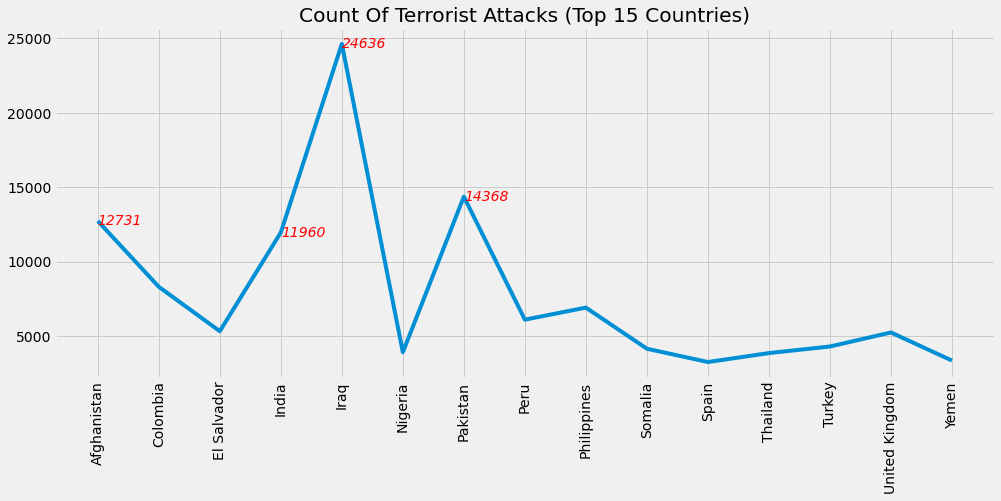

In [36]:
from matplotlib import style
style.use("fivethirtyeight")

plt.subplots(figsize = (15,6))
ax = sns.lineplot(x = cntry[:15], y = atkcnt[:15], palette='RdPu_r')
plt.xticks(rotation = 90)
ax.text(4, 24636, 24636, verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
ax.text(3, 11960, 11960, verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
ax.text(0, 12731, 12731, verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
ax.text(6, 14368, 14368, verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
plt.title('Count Of Terrorist Attacks (Top 15 Countries)')
plt.show()


 * Here we can see __Iraq__, __Pakistan__, __Afghanistan__, and __India__ are the most affected countries because of terrorism.


### Attacking Methods

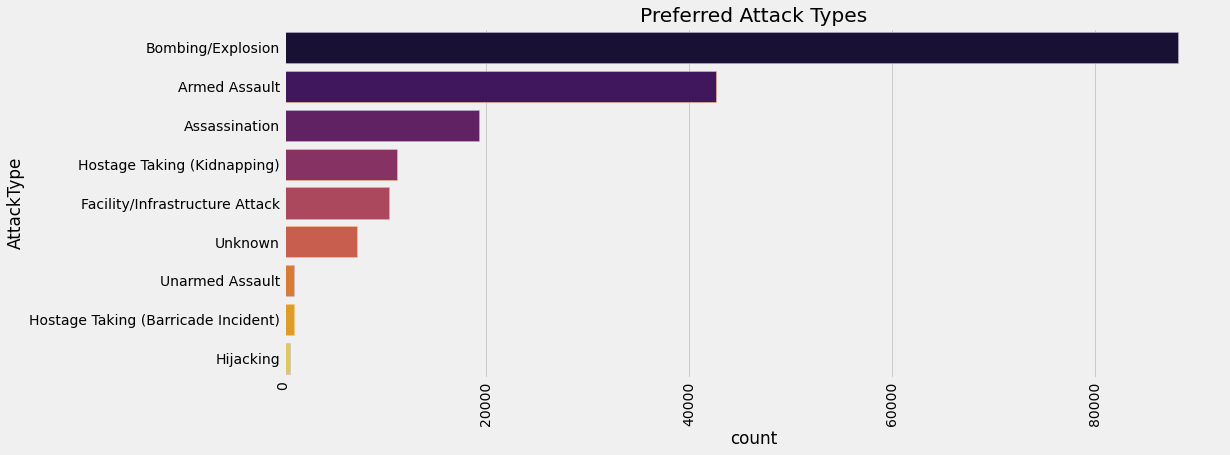

In [14]:
from matplotlib import style
style.use("fivethirtyeight")


sns.countplot(y = df["AttackType"], palette='inferno', edgecolor = sns.color_palette("PuOr_r", 2), order=df['AttackType'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Preferred Attack Types')
plt.show()


   * __Bombing__ and __Armed Assault__ are the favorite attacking methods of terrorists.

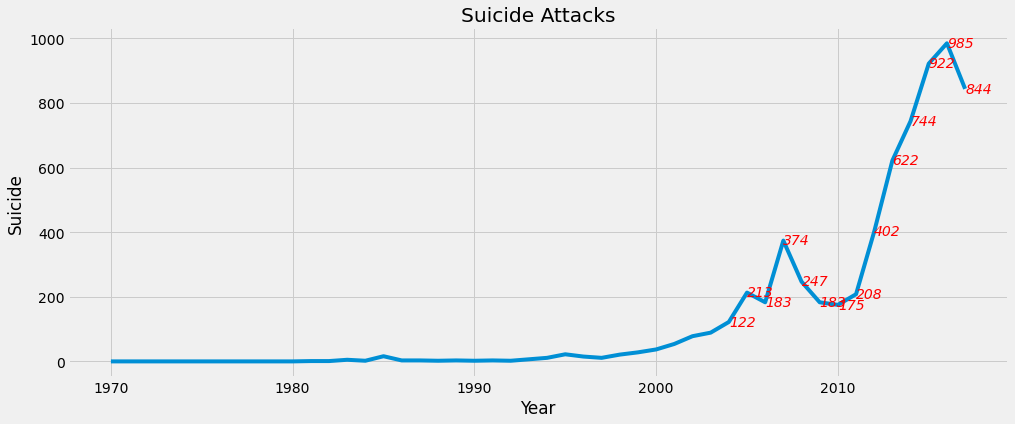

In [38]:
# Suicide Attacks, Both Success's And Fails
suicides_by_year = df[["Year","Suicide"]].groupby("Year").aggregate(np.sum)
suicides_by_year = pd.DataFrame(suicides_by_year)
ax = sns.lineplot(suicides_by_year.index, suicides_by_year["Suicide"])
for i in range(47):
    if list(suicides_by_year["Suicide"])[i] > 100:
        ax.text(suicides_by_year.index[i], list(suicides_by_year["Suicide"])[i], list(suicides_by_year["Suicide"])[i], verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
plt.title("Suicide Attacks")
plt.show()


   * A suicide attack is any violent attack, usually involving an explosion, in which attackers accept their death as a direct result of the attacking method used.
   * The decade __2010 - 2020__ has witnessed a dramatic increase in suicide attacks.
   * __2004__ is the year from which suicide attacks starts gaining speed.

### Trends In Terrorism

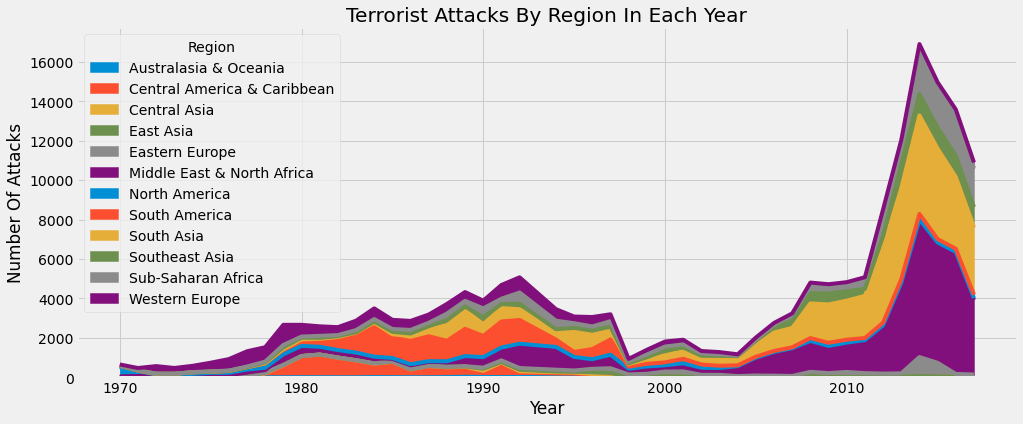

In [16]:
pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(15,6))
plt.title('Terrorist Attacks By Region In Each Year')
plt.ylabel("Number Of Attacks")
plt.show()

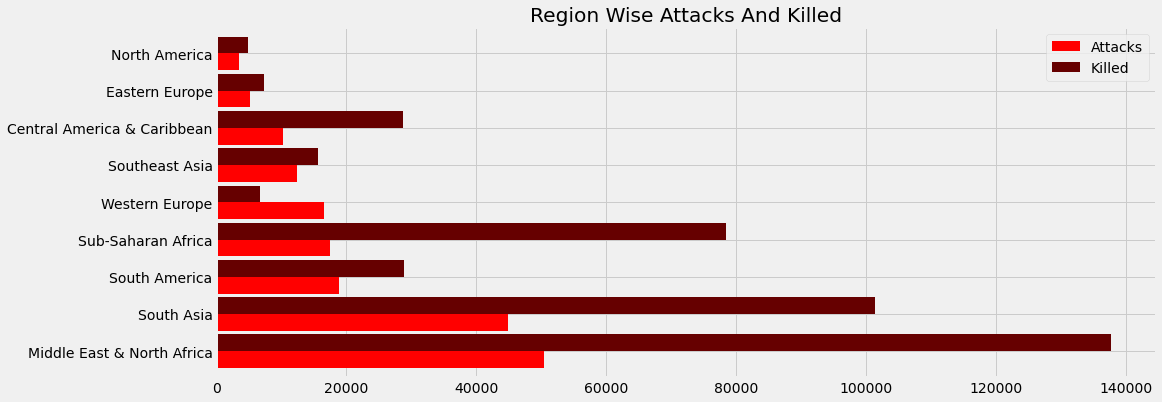

In [17]:
cnt_atk = df['Region'].value_counts()[:9].to_frame()
cnt_atk.columns = ['Attacks']
cnt_killed = df.groupby('Region')['Killed'].sum().to_frame()
cnt_atk.merge(cnt_killed, left_index = True, right_index = True, how='left').plot.barh(width = 0.9, 
                                                                        color = {"#FF0000": "Killed", "#660000": "Attacks"})
plt.title("Region Wise Attacks And Killed")
plt.show()

* Here we can see that __MENA__, __SA__, __Sub-Saharan Africa__ are the regions with the greater number of people killed as compared to the number of attacks.

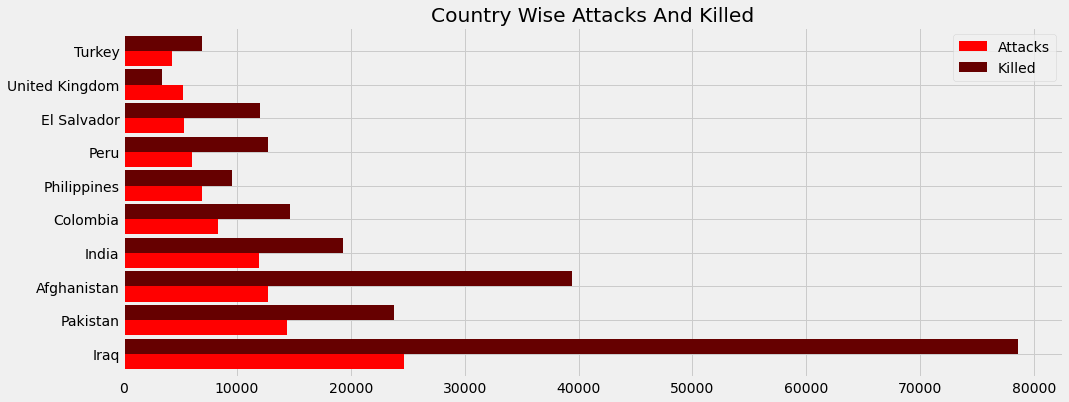

In [18]:
cnt_atk = df['Country'].value_counts()[:10].to_frame()
cnt_atk.columns = ['Attacks']
cnt_killed = df.groupby('Country')['Killed'].sum().to_frame()
cnt_atk.merge(cnt_killed, left_index = True, right_index = True, how = 'left').plot.barh(width = 0.9,
                                                                        color = {"#FF0000": "Killed", "#660000": "Attacks"})
plt.title("Country Wise Attacks And Killed")
plt.show()

* __Iraq__ is the country with the highest number of attacks and the highest number of people killed.

### Deadliest Terrorist Groups

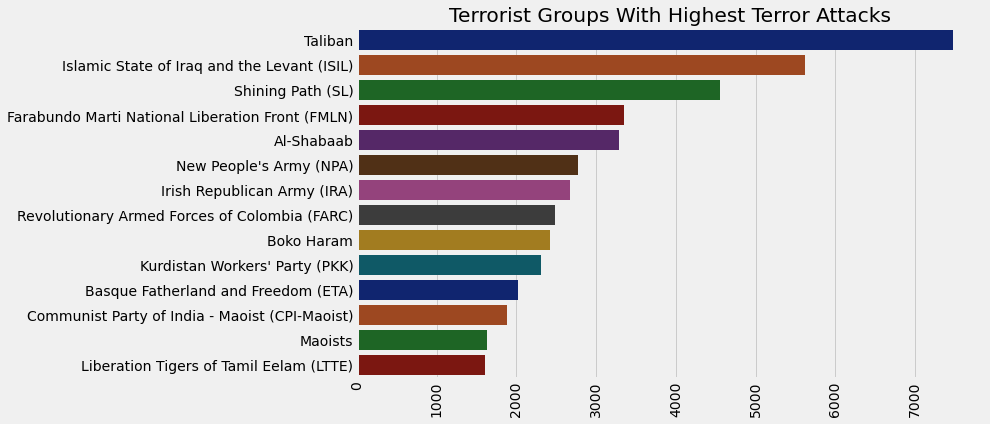

In [19]:
sns.barplot(df['Group'].value_counts()[1:15].values, df['Group'].value_counts()[1:15].index, palette=('dark'))
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Terrorist Groups With Highest Terror Attacks')
plt.show()

* __Taliban__ is a group with the highest number of terror attacks done.
* __Taliban__, __ISIL__, __SL__ are the groups that collectively holds a big percentage of the total number of attacks done by all terrorist groups so far.

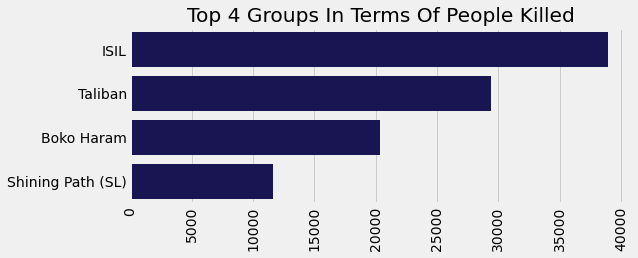

In [20]:
grp_killed = df.groupby("Group")["Killed"].sum()
fig = plt.figure(figsize = (8, 3))
grp_killed = pd.DataFrame(grp_killed)
grp_killed = grp_killed.sort_values(by = "Killed", ascending = False)
xx = list(grp_killed.index)
xx[1] = 'ISIL'
yy = list(grp_killed["Killed"])
sns.barplot(x = yy[1:5], y = xx[1:5], color ='#110a5c')
plt.xticks(rotation = 90)
plt.title("Top 4 Groups In Terms Of People Killed")
plt.show()

* Number of people killed by these 4 groups: 100262
* Percentage of people killed by these 4 groups: (100262 / 411868) * 100 = 24.34
* Almost 1 / 4 of Killings are done by these 4 groups only.

### Region Wise Success %

In [21]:
cnt_atk = df['Region'].value_counts()
cnt_suc = df.groupby('Region')['Success'].sum()

d = dict()
d["Region"] = []
d["% Success"] = []

for x in cnt_atk.index:
    if x in cnt_suc.index:
        d["Region"].append(x);
        d["% Success"].append(np.round(((cnt_suc[x] / cnt_atk[x]) * 100), 2))
        
d = pd.DataFrame(d).sort_values(by = '% Success', ascending = False)
d.reset_index(drop = True, inplace = True)


d.head(12)

,Region,% Success
0,Central America & Caribbean,96.47
1,South America,92.84
2,Sub-Saharan Africa,92.75
3,Central Asia,89.70
4,Southeast Asia,89.32
5,Middle East & North Africa,87.81
6,South Asia,87.54
7,Eastern Europe,86.26
8,Western Europe,85.11
9,Australasia & Oceania,85.11



* Above we can observe that success % in all the regions is high which shows that all the regions are greatly affected and pressurized by the terrorism.


### Overall Success %

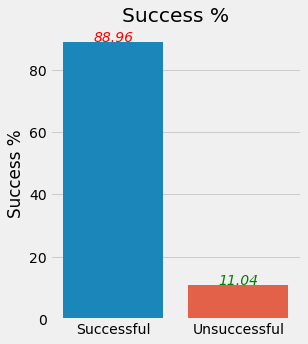

In [22]:
succ_perc = (df["Success"].sum() / len(df)) * 100
unsucc_perc = 100 - succ_perc 
tt_a = [succ_perc, unsucc_perc]
tt_b = ["Successful", "Unsuccessful"]

fig = plt.figure(figsize = (4, 5))
ax = sns.barplot(x = tt_b, y = tt_a)
plt.ylabel("Success %")
plt.title("Success %")
ax.text(0, tt_a[0], np.round(tt_a[0], 2),horizontalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'r')
ax.text(1, tt_a[1], np.round(tt_a[1], 2),horizontalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'green')
plt.show()  

* Here we can see success rate of terrorism is very high.

## Result: IRAQ Is The Red Hot Zone Of Terrorism